<center><img src="Title.png" alt="Goodreads or Foodreads" width="1000"/></center>

<h1><center>Understanding Reading and Socializing Trends and their Relationship</center></h1>


In [197]:
# Libraries for data cleaning and manipulation
import sqlite3
import re
import datetime
import db_caller
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# EXECUTIVE SUMMARY

The advent of the internet and the proliferation of social media and smartphones are often ascribed as the key reasons for the decline in the reading habits of the general population. Although many are inclined to agree that the popularity of modern social networking platforms such as Instagram and Tiktok contribute to the reduced reading time, there appears to be no conclusive evidence on this. Also, although reading more books is one of the most common New Year's resolutions, there is a general trend that people failed to follow through with the resolution to read more books. Some argue that people nowadays prefer to do social-related activities instead  of spending time reading books. The data from the American Time Use Survey (2016) showed an overall gradual decline in the average hours spent reading. Coincidentally, there seems to be a rise in socializing activities as more people are engaging in eating out and game playing. However, no conclusive data has established the correlation between going out and declining reading habits.

To help investigate the relationship between reading habits and going out, we used Yelp and Book Graph datasets to examine whether or not going out contributed to the decline of reading habits from 2014 to 2017. We consolidated the datasets into one database, processed our data by standardizing datetime columns, dropping irrelevant columns, merging tables with interesting relationships, and conducted exploratory data analysis (EDA).

Our analysis showed three key insights:
1. There is a general decline in reading habits over the years. Although people aspire to read more for the new year, reading declines just a few months later, according to the Book Graph data.

2. Although people are going out less, the Yelp dataset indicate a general trend that the experience quality is increasing.

3. People generally resolve to read more and go out more at the start of the year, but despite the good intentions, these behaviors drop just a few months later. 

The team discovered a relationship between reading habits and going out. Contrary to our expectations, the results showed that both activities exhibit a peak at the start of the year but gradually declines as the months go by. People resolve to read and go out more but they were unable to follow through successfully throughout the year. However, the team realized that there might be potential bias on the Book Graph dataset since there may be a tendency for Goodreads users to input all the books they have read throughout the year at the end.

# INTRODUCTION

## Background

With the advent of social media and online streaming, many have lamented the decline in reading habits for most adults and children. Using the data from the American Time Use Survey, a New Yorker article penned by Caleb Crain, 'Why We Don't Read, Revisited' pointed out that the time spent reading has been on steady decline since 2003. This decline seemed to be correlated with a rise in other activities related to 'socializing and communication' as indicated in the American Time Use Survey. 

## Problem Statement

Our group intends to investigate whether or not there is a decline in American reading habits, and if it is related to the socializing activities. Specifically, 
1. How did reading behaviour change between 2014 to 2017?
2. How did socializing behaviour (going out) change between 2014 to 2017?
3. Is there a relationship between the frequency of reading and the frequency of going out and doing social-related activities?

# METHODOLOGY
The methodology focused on three key steps: (1) data collection, (2) data processing and cleaning, (3) Exploratory Data Analysis (EDA). The steps of the method are detailed as follows:

## 1. Data Collection
The group consolidated UCSD Book Graph and Yelp data into a single SQLite database. Due to the size of the datasets and computational limitation, the group limited the scope of the datasets for this report. For Yelp, the group focused on businesses with attributes relevant to data exploration objectives, such as check-in data, open rate, with user reviews, and the like. Under Bookgraph, the group selected romance books and its corresponding interaction dataset.

## 2. Data Processing and Cleaning

To combine the data sets, the group changed all date-related columns to datetime type and merged related datasets based on the datetime data. We then conducted datetime processing, as needed, for the analysis.

## 3. Exploratory Data Analysis (EDA)

Exploratory data analyses were then performed initially for the individual data sets. Analyses were made to look into Yelp and Book Graph reviewers behavior throughout a given period (year, month, day). Finally, relationships between the two were analyzed.

# DATA DESCRIPTION

For this activity, the group looked into two bundles of datasets namely Bookgraph and Yelp. Bookgraph dataset looks into book reviews in the United States, specified by genre (i.e., romance, young adult, children, etc.) and interactions. Yelp dataset, on the other hand, looks into reviews of American establishments and services (i.e., stores, hotels, restaurants, etc.), specified as academic or business.

### Overview

From the wide range of selections under Yelp (2005-2022) and Book Graph (2014-2017) data sets, we choose the following data sets for this report: <i>Yelp Checkin</i>, <i>Yelp Review</i>, <i>Yelp Business</i>, <i>Book Graph Romance Books</i>, and <i>Book Graph Romance Books Interactions</i>.

| Data Set | Description |
| --: | :-- |
| Yelp Checkin | Looks into the time (date and time) of check-in for businesses
| Yelp Review | Looks into the businesses' user reviews
| Yelp Business | Looks into the location and category of businesses
| Book Graph Romance Books | Looks into publication details of romance books
| Book Graph Romance Books Interactions | Looks into reviews of romance books

##### Yelp Checkin

Yelp Checkin data set has a little under 132,000 data points, with two features namely business ID and corresponding check-in date and time, mostly having multiple check-in dates.

| Feature | Description | Object | Tag
| :-- | :-- | :-- | :--
| Business ID | Yelp ID of a given business | string | `business_id`
| Time | Check-in date/s and time/s for a particular business | datetime | `date`

##### Yelp Review

Yelp Review data set consists of 350,000 (sample) data points with 9 features, identifying reviews and ratings of a certain user to a particular business, establishment, or service.

| Feature | Description | Object | Tag
| :-- | :-- | :-- | :--
| Review ID | Yelp ID of a given review | string | `review_id`
| User ID | Yelp ID of a given user / reviewer | string | `user`
| Business ID | Yelp ID of a given business | string | `business_id`
| Star Rating | number of stars given by a reviewer | integer | `stars`
| Descriptive Ratings | rating of description of an item or a service | integer | `useful`, `funny`, `cool`
| Review | review of a given user for a particular business | string | `text`
| Time | date and time a particular review is made | datetime | `date`

##### Yelp Business

Yelp Review data set consists of a little over 150,000 data points with 60 features, identifying location details of a business registered in Yelp. We narrowed down the features of this data set for the purposes of this report.

| Feature | Description | Object | Tag
| :-- | :-- | :-- | :--
| Business ID | Yelp ID of a given business | string | `business_id`
| Business Name | name of a given business | string | `name`
| Business Address | name of a given business | string | `address`
| City | city where a given business is located | string | `city`
| State | state where a given business is located | string | `state`
| Postal Code | postal code of a given business's location | integer | `postal code`
| Latitude | latitude of a business's location | float | `latitude`
| Longitude | longitude of a business's location | float | `longitude`
| Stars | average star rating of a given business | float | `stars`
| Review Count | total reviews for a given business | integer | `review_count`
| Status | operational status of a given business | integer | `is_open`
| Categories | a given business's category/ies | list | `categories`

##### Book Graph Romance Books

Book Graph Romance Books data set consists of about 335,500 data points with 8 features, identifying details of publication of romance books.

| Feature | Description | Object | Tag
| :-- | :-- | :-- | :--
| Book ID | Book Graph ID of a given business | integer | `book_id`
| Book Title | title of a given book | string | `title` |
| Ratings Count | total times a given book has been rated | integer | `ratings_count` |
| Country Code | book's country code of publication | string | `country_code` |
| Publication Year | book's year of publication | integer | `publication_year` |
| Publication Month | book's month of publication | integer | `publication_month` |
| Publication Day | book's day of publication | integer | `publication_day` |
| Type | identification whether a given book is an e-book | boolean | `is_ebook` |

##### Book Graph Romance Books & Interactions

Book Graph Romance Books & Interactions data set consists of 2,150,000 (sample) data points with 10 features, identifying reviews, updates, and status of romance books.

| Feature | Description | Object | Tag
| :-- | :-- | :-- | :--
| User ID | Book Graph ID of a given user / reviewer | string | `user`
| Book ID | Book Graph ID of a given book | integer | `book_id`
| Review ID | Book Graph ID of a given review | string | `review_id`
| Read Status | identification whether a given book is read by the reviewer | integer | `is_read` |
| Rating | reviewer's rating of a given book | integer | `rating` |
| Review | review of a given user for a particular book | string | `review_text_incomplete`
| Date Added | date and time a review for a given book was made | string | `date_added` |
| Date Updated | date and time a review for a given book was updated | string | `date_updated` |
| Date Finished | date and time a reviewer finished reading a given book | string | `read_at` |
| Date Started | date and time a reviewer started reading a given book | string | `started_at` |

# DATA COLLECTION
-----

The group consolidated these data sets from Book Graph and Yelp in a single SQLite database through running a separate notebook, `db_maker.ipynb`, and a script `db_caller` to make a connection to the database anonymously. From these, exploratory data analyses were made to look into Yelp and Book Graph reviewers behavior.

The following adjustments were made when adding these files to the database:

| SQL Table Name | Original File Name | Data Set | Adjustments
| :- | :- | :- | :- |
| bookgraph_romance_books | goodreads_books_romance.json.gz | UCSD Book Graph | Kept only "book_id", "title", "ratings_count", "country_code", "publication_year", "publication_month", "publication_day", "is_ebook" columns using pd.read_json()
| bookgraph_romance_interactions | goodreads_interactions_romance.json.gz | UCSD Book Graph | Took a random sample of 50,000 lines for every chunk of 1,000,000 lines (sample of appx. 5% of the total data) using pd.read_json()
| yelp_checkin | yelp_academic_dataset_checkin.json | Yelp | Read and added normally through pd.read_json()
| yelp_review | yelp_academic_dataset_review.json | Yelp | Took a random sample of 50,000 lines for every chunk of 1,000,000 lines (sample of appx. 5% of the total data) using pd.read_json()
| yelp_business | yelp_academic_dataset_business.json | Yelp | Read using json and normalized using pd.json_normalize() for attributes 

# DATA PROCESSING AND CLEANING
-----

In [197]:
# Libraries for data cleaning and manipulation
import sqlite3
import re
import datetime
import db_caller
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATA**

The group connected to the created SQLite database and assigned each table to a pandas DataFrame. The following table matches the SQL Table to its corresponding variable name used in the EDA.

| Variable Name | SQL Table Name | Original File Name | Dataset
| :- | :- | :- | :- |
| rom_books | bookgraph_romance_books | goodreads_books_romance.json.gz | UCSD Book Graph |
| rom_int | bookgraph_romance_interactions | goodreads_interactions_romance.json.gz | UCSD Book Graph |
| checkin | yelp_checkin | yelp_academic_dataset_checkin.json | Yelp |
| review | yelp_review | yelp_academic_dataset_review.json | Yelp |
| business | yelp_business | yelp_academic_dataset_business.json | Yelp |

In [5]:
# Anonymous conncetion to LR1.db (Lab Report 1 Database)
conn = db_caller.connect("LR1.db")

In [6]:
# Assign each table to a pandas DataFrame
# UCSD bookgraph data
rom_books = pd.read_sql("SELECT * FROM bookgraph_romance_books", conn)
rom_int = pd.read_sql("SELECT * FROM bookgraph_romance_interactions", conn)
# Yelp data
checkin = pd.read_sql("SELECT * FROM yelp_checkin", conn)
review = pd.read_sql("SELECT * FROM yelp_review", conn)
business = pd.read_sql("SELECT * FROM yelp_business", conn)

**FIXING DATETIME COLUMNS**

The group converted the following features from string to datetime format:
* `date_added` in `rom_int`
* `date` in `review`

In [8]:
# Convert 'date_added' to datetime format in 'rom_int'
rom_int['date_added'] = pd.to_datetime(rom_int['date_added'],
                                       format="%a %b %d %H:%M:%S %z %Y",
                                       utc=True)
rom_int['date_added'] = rom_int['date_added'].dt.tz_convert('EST')

In [9]:
# Convert 'date' to datetime format in 'review'
review['date'] = pd.to_datetime(review['date'], format="%Y-%m-%d %H:%M:%S")

**CREATING NEW DATAFRAMES**

The group created the following DataFrames to assist in exploratory data analysis:

| Variable Name | Original DataFrames | Remarks |
| :- | :- | :- |
| rom_db | rom_int, rom_books | Left-joined by `book_id` to include titles of most popular books |
| publish | rom_db | Interactions with read romance books sorted by `publication_year` as new index |
| ebook_or_not | rom_db | Interactions with read romance books sorted by if ebook or not by month |
| read_or_not | rom_int | Interactions with romance books sorted by if read or not by month |
| rom_reviews | review | Yelp reviews with `text` containing the word `romantic` |
| outtime | rom_reviews | Yelp reviews with `date` year 2015 onwards and `text` containing the word `romantic`|
| readtime | rom_int | entries with `date_added` year 2014 onwards, and `is_read` == 1 for books read 2014-2017 |
| readtime_month_mean | readtime | readtime resampled by mean of each month (Jan to Dec) |
| readtime_day_mean | readtime | readtime resampled by mean of each day of the week (Sun to Sat) |
| checkin_dates | checkin | Occurrences per date of Yelp check-ins |
| review_stars | reviews | Average Yelp star review rating per month |
| yelp_book_mean | reviews, rom_db | Average count of yelp and romance book reviews per month |

In [12]:
# Create rom_db
rom_db = pd.merge(rom_int, rom_books, on="book_id", how="left")
# Only include entries from 2014 onwards
rom_db = rom_db[rom_db['date_added'].dt.year >= 2014]
# Change 'is_ebook' column from string to integer
rom_db['is_ebook'] = rom_db['is_ebook'].replace({'false': 0, 'true': 1})

In [14]:
# Create publish
publish = pd.DataFrame(rom_db['publication_year'].value_counts().sort_index())
publish = publish[1:]  # Get rid of NaN year
publish.index = pd.to_numeric(publish.index)  # Turn index into integers
years = list(range(1970, 2023))  # publishing years of 1970 to 2023
publish = publish[publish.index.isin(years)]

In [95]:
# Create ebook_or_not
ebook_or_not = (rom_db.groupby([pd.Grouper(key='date_added', freq='M'),
                                'is_ebook'])
                .count()
                .reset_index(level='is_ebook'))

In [110]:
# Create read_or_not
read_or_not = rom_db.groupby([pd.Grouper(key='date_added', freq='M'),
                              'is_read']).count().reset_index(level='is_read')

In [15]:
# Create readtime
readtime = (pd.DataFrame(rom_int[(rom_int['date_added'].dt.year >= 2014) &
                                 (rom_int['is_read'] == 1)]
            .groupby('date_added')
            .count()['is_read']))

In [16]:
# Create rom_reviews and outtime
rom_reviews = review[review['text'].str.contains('.*romantic.*',
                                                 regex=True,
                                                 na=False,
                                                 flags=re.IGNORECASE)]
outtime = pd.DataFrame(rom_reviews[(rom_reviews['date'].dt.year >= 2014)]
                       .groupby('date')
                       .count()['text'])

In [ ]:
# Create readtime_month_mean
readtime_month_mean = {}
for i in range(1, 13):
    readtime_month_mean[i] = (readtime.resample('M').count()
                              [readtime.resample('M')
                               .count().index.month == i].mean()[0])
readtime_month_mean = pd.DataFrame(readtime_month_mean,
                                   index=['Month Mean']).T

In [ ]:
# Create readtime_day_mean
readtime_day_mean = {}
for i in range(0, 7):
    readtime_day_mean[i] = (readtime.resample('D').count()
                            [readtime.resample('D').count()
                             .index.weekday == i].mean()[0])
readtime_day_mean = pd.DataFrame(readtime_day_mean, index=['Day Mean']).T

In [210]:
# Create checkin_dates
def split_it(date):
    """Extract dates from a list"""
    return date.strip().split(',')


checkin['date'] = checkin['date'].agg(lambda x: split_it(x))
checkin = checkin.explode('date')

# for checkin comparison, obtain only relevant
df_business = business[['business_id', 'name', 'city']]
df_chk_bus = checkin.merge(df_business, how='left', on='business_id')
df_chk_bus['date'] = pd.to_datetime(df_chk_bus['date'])
df_chk_bus_2 = df_chk_bus[df_chk_bus['date']
                          > '2014-01-01'].sort_values(by=['date'])
checkin_dates = df_chk_bus_2.resample('D', on='date').size()

In [250]:
# Create review_stars
review_stars = review.groupby(review['date'].dt.year)['stars'].mean()

In [ ]:
# Create yelp_book_mean
# Getting a random sample to match the data size
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

rom_db_sample = rom_db.sample(len(review))
temp = review.groupby('date').count().resample('M').count()
yelp_mean = temp.groupby(temp.index.month).mean()['review_id']
temp = rom_db_sample.groupby('date_added').count().resample('M').count()
book_mean = temp.groupby(temp.index.month).mean()['date_updated']

yelp_book_mean = pd.merge(yelp_mean, book_mean,
                          left_index=True, right_index=True)
yelp_book_mean.index = months

# EXPLORATORY DATA ANALYSIS
-----

## Reading Behavior

### Reading Frequency/Seasonality

**New Year’s Resolutions phenomenon in effect**

Is the allure of romance fading?
Isolating data on reading frequency paints a sad picture for book-lovers, at least for those fond of romance novels. The 4-year trend has been on the decline on-average since 2014. 

What's amusing, however, is the jolt in reading activity every start of the year. It is no surprise that 'read more' is in a lot of people's new year's resolutions. But we consistently see this activity taper off as the months go on. People cannot seem to keep it up!


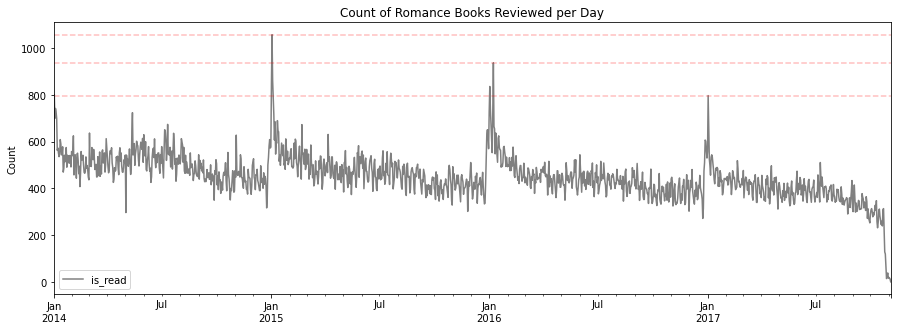

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
readtime.resample('D').count().plot(ax=ax, color='grey')
ax.set_title('Count of Romance Books Reviewed per Day')
ax.set_xlabel('')
ax.set_ylabel('Count')

for yr in range(2015, 2018):
    spikes = pd.DataFrame(readtime.resample('D').count()['is_read']
                          .nlargest(10))
    y = spikes[spikes.index.year == yr]['is_read'][0]
    ax.axhline(y=y, color='r', linestyle='--', alpha=0.25)

**Reading at the bookends of the year**

While the total count may be seen on the decline, average reviews by month remains more or less steady. It can be observed that months leading to winter is the period of apathy for these romance novel readers. Come December however, reading picks back up again.

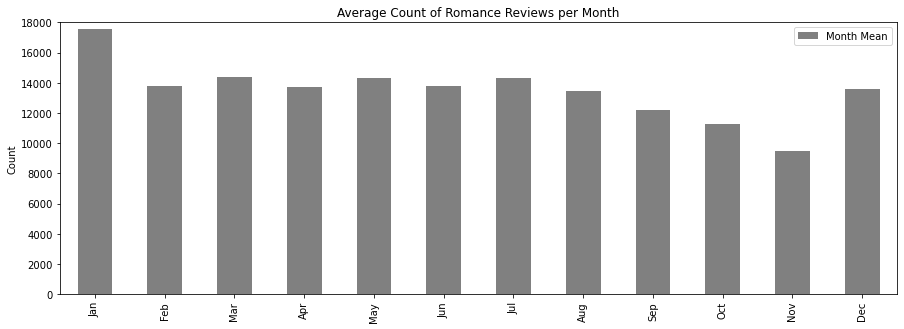

In [202]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
readtime_month_mean.plot(kind='bar', ax=ax, color='grey')
ax.set_ylim([0, 18000])
ax.set_title('Average Count of Romance Reviews per Month')
ax.set_xticklabels(months)
ax.set_ylabel('Count')

**Slight dip in reading at Friday night on average**

The same goes for data on a per-day basis. Visually, we see no significant differences in the reading/reviewing activities for the various days. Just of particular note is Friday, where people may be more interested in going out than curled up reading a book.

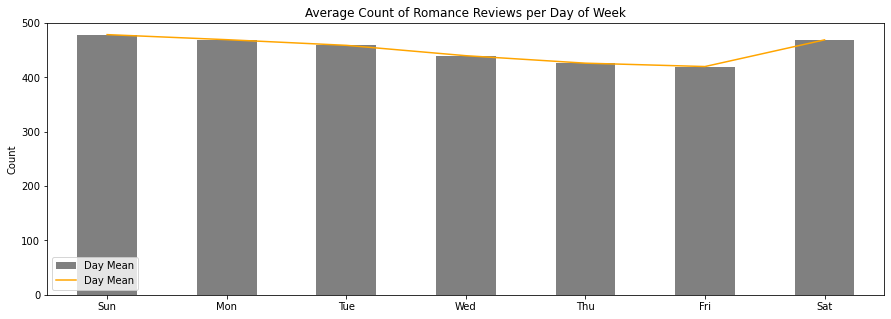

In [203]:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
readtime_day_mean.plot(kind='bar', ax=ax, color='grey')
readtime_day_mean.plot(kind='line', ax=ax, color='orange')
ax.set_title('Average Count of Romance Reviews per Day of Week')
ax.set_ylabel('Count')
ax.set_xticklabels(days)
ax.set_ylim([0, 500])

### E-book Popularity

**Rise in popularity of e-books has surpassed that of traditional books in mid-2016**

E-books popularity is parallel with the consistent use of smartphones, having electronic book applications handily available. Sudden dip in 2017 is due to data collection that ended the same year.

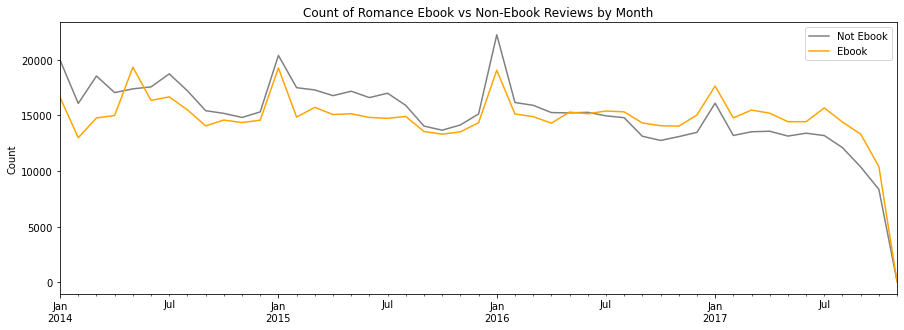

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ebook_or_not[['title']].loc[ebook_or_not['is_ebook'] == 0].plot(ax=ax,
                                                                color='grey')
ebook_or_not[['title']].loc[ebook_or_not['is_ebook'] == 1].plot(ax=ax,
                                                                color='orange')
ax.legend(labels=['Not Ebook', 'Ebook'])
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Count of Romance Ebook vs Non-Ebook Reviews by Month')

Just like in the first graph, we can see a decline in the difference between non-ebooks and e-books, with e-books outnumbering non-ebooks by mid-2016 onwards (zeroing out by the end of 2017 as data collection has ended).

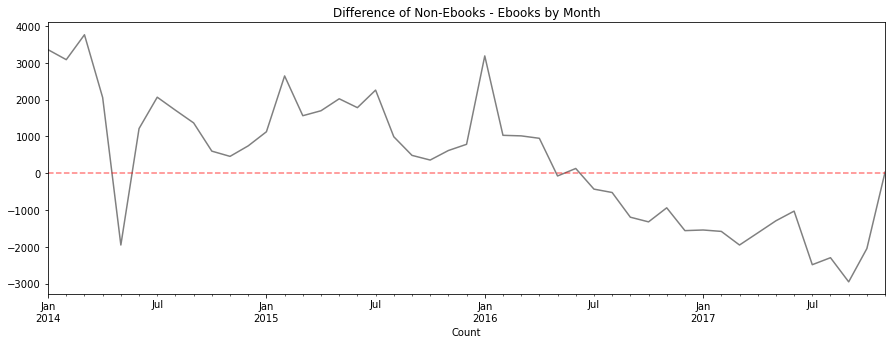

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ebook_diff = ebook_or_not.diff(periods=-1)
ebook_diff[ebook_diff['is_ebook'] == -1]['user_id'].plot(ax=ax,
                                                         color='grey')
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax.set_xlabel('')
ax.set_xlabel('Count')
ax.set_title('Difference of Non-Ebooks - Ebooks by Month')

### Planning-to-Read Behavior

**Procrastination among readers has increased over the years**

The ease with which consumers can now gain access to reading materials has widened the gap between the reader’s to-read pile and the actual number of books finished reading. This is aligned with the overall decline in reading habits among Americans over the years.


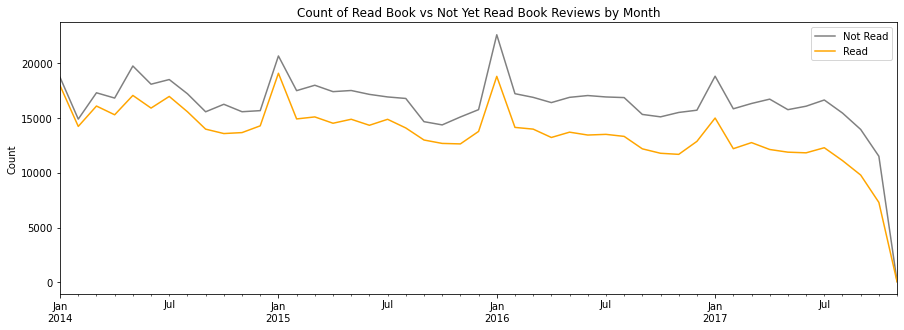

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
read_or_not[['title']].loc[read_or_not['is_read']
                           == 0].plot(ax=ax, color='grey')
read_or_not[['title']].loc[read_or_not['is_read']
                           == 1].plot(ax=ax, color='orange')

ax.set_xlabel('')
ax.set_ylabel('Count')
ax.legend(labels=['Not Read', 'Read'])
ax.set_title('Count of Read Book vs Not Yet Read Book Reviews by Month')

Just like in the first graph, the widening gap between readers’ to-read and read piles translates to an increasing difference between have-read and have-not-read books.

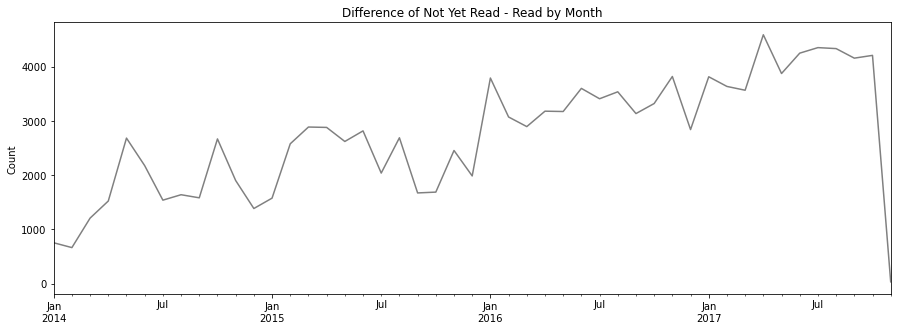

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
read_diff = read_or_not.diff(periods=-1)
read_diff[read_diff['is_read'] == -1]['user_id'].plot(ax=ax, color='grey')

ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Difference of Not Yet Read - Read by Month')

### Books Read per Person

**The average bookreader reads around 4 books**

When grouping the interactions database by user, the average count of entries (books that have been read) is 4. This is highly skewed due to huge outliers of users with 200+ reviews. When filtering out these persons, the standard bookreader has only read 1-2 books.

In [390]:
print('Average number of romance books read:')
print(f'{rom_db[rom_db["is_read"] == 1].groupby("user_id").size().mean():.2f}')

Average number of romance books read:
4.24


In [387]:
reading = pd.DataFrame(rom_db[rom_db['is_read'] == 1]
                       .groupby('user_id')
                       .count()['is_read'])
display(reading.nlargest(5, 'is_read'))

,is_read
user_id,
2d13f995e7b765b08e09b3f9e52c32e0,566
7178ae3cd5b7e0018ff7dae55dfce9ea,302
12dacf0a1faaaa188ee946088fb4d34e,272
c5823767a1a164cd8e9d029f1806f2aa,268
b7772313835ce6257a3fbe7ad2649a29,267


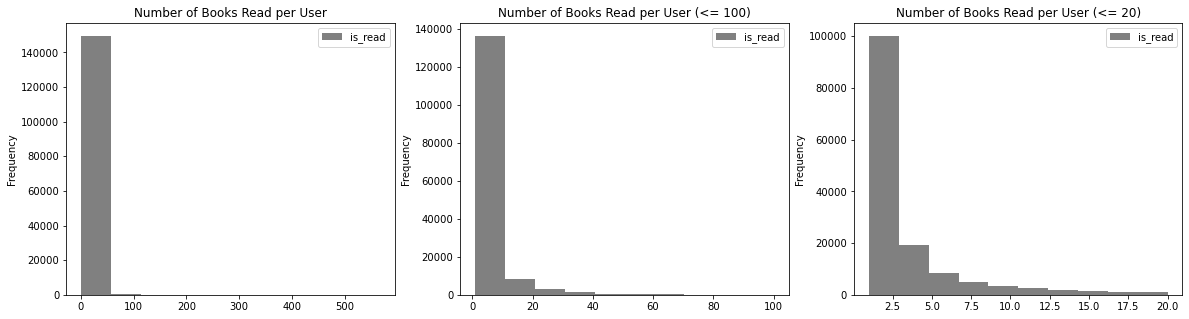

In [388]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
reading.plot.hist(ax=ax[0], color='grey')
reading[reading['is_read'] <= 100].plot.hist(ax=ax[1], color='grey')
reading[reading['is_read'] <= 20].plot.hist(ax=ax[2], color='grey')

ax[0].set_title('Number of Books Read per User')
ax[1].set_title('Number of Books Read per User (<= 100)')
ax[2].set_title('Number of Books Read per User (<= 20)')

### Characteristics of Popular Books

**Modern books for modern people** 

The evident discrepancy in the read count from 2014 to 2017 between classical and modern literature suggests a general preference for contemporary books. Perhaps, readers find the recently published romance books more interesting and relatable compared to classical romance novels.


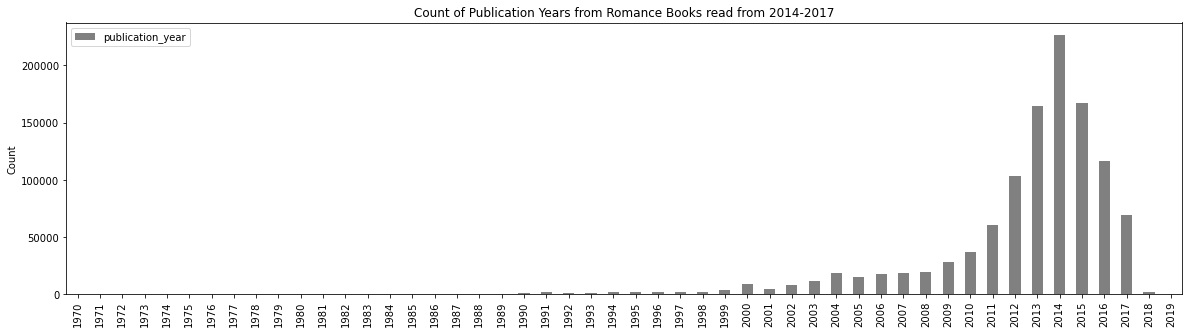

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
publish[(publish.index <= 2022) & (publish.index != np.nan)
        ].plot.bar(ax=ax, color='grey')
ax.set_title(
    'Count of Publication Years from Romance Books read from 2014-2017')
ax.set_ylabel('Count')

**But old classics die hard**

The novel Pride and Prejudice by Jane Austen is still a popular choice among readers. Perhaps, the story is still relatable today, making it a consistent book choice for romance readers despite modern books dominating reviews — a timeless classic.

In [164]:
idx = rom_db['date_added'].dt.year
popular_books = pd.DataFrame(pd.pivot_table(rom_db,
                                            values='review_id',
                                            columns=idx,
                                            index='title',
                                            aggfunc='size',
                                            fill_value=0).sum(axis=1)
                             .to_frame()[0].nlargest())
popular_books.columns = ['Count']
display(popular_books)

,Count
title,
Pride and Prejudice,5578
"Me Before You (Me Before You, #1)",4690
Wuthering Heights,3391
"The Selection (The Selection, #1)",3134
Romeo and Juliet,3101


## Socializing Behavior
-----

### Outing Frequency/Seasonality

**Effects of the pandemic, but also a steady decline**

Using check-ins to count unique instances of check-in' to a business, we observe that even before the 2020 pandemic, instances have been on the decline. The huge drop in March 2020 is as expected, and based on the data, levels as of 2022 are still a ways off from even 2020 highs. The group, however, notes that no substantial conclusion may be made yet, since the decline may be attributed to less users actually using the 'check-in' feature.

Nonetheless, the seasonal beginning and summer peaks of each year are also visibly decreasing over time.

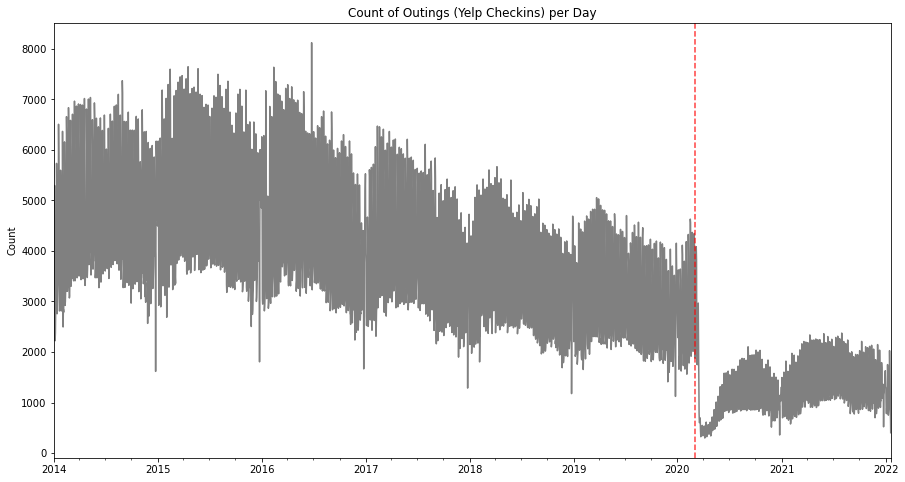

In [248]:
fig, ax = plt.subplots(figsize=(15, 8))
checkin_dates.plot(ax=ax, color='grey')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('Count of Outings (Yelp Checkins) per Day')
ax.axvline(x=datetime.datetime(2020, 3, 1),
           color='r', linestyle='--',
           alpha=0.75)

### Outing Quality

**Steadily improving, before the pandemic**

The graph shows that average outing rating started out high in Yelp’s more tender years, only to subside a few years later. It should be noted that after this, average ratings found themselves steadily rising again after the first handful of years in Yelp’s operations in the focused time period of 2014-2017, only for it to drop into the pandemic.

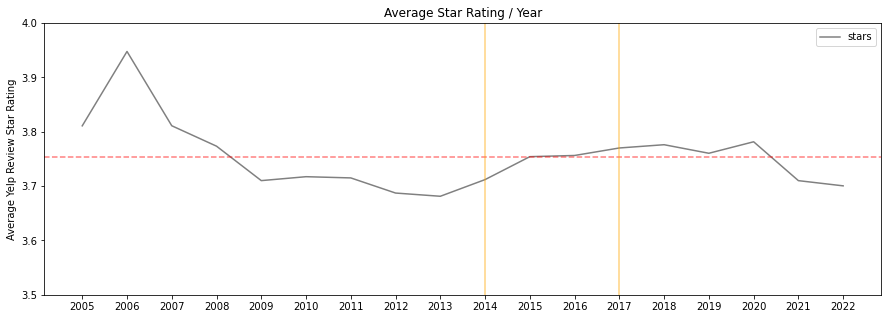

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(review_stars.index, review_stars, label='stars', color='grey')
ax.set_title('Average Star Rating / Year')
ax.set_xlabel('')
ax.set_ylabel('Average Yelp Review Star Rating')
ax.set_xticks(review_stars.index)
ax.set_xticklabels(review_stars.index)
ax.axhline(y=review_stars.mean(), color='red', linestyle="--", alpha=0.5)
ax.axvline(x=2017, color='orange', alpha=0.5)
ax.axvline(x=2014, color='orange', alpha=0.5)
ax.set_ylim([3.5, 4])
plt.legend()
plt.show()

## Relationship between Reading and Socializing Behavior

**Year starters**

The figure indicates a noticeable peak for both book reviews and Yelp reviews for summer (June, July, August) and winter (December, January). The obvious increase in the Yelp reviews suggest that most people are taking advantage of a pleasant weather to spend time out.

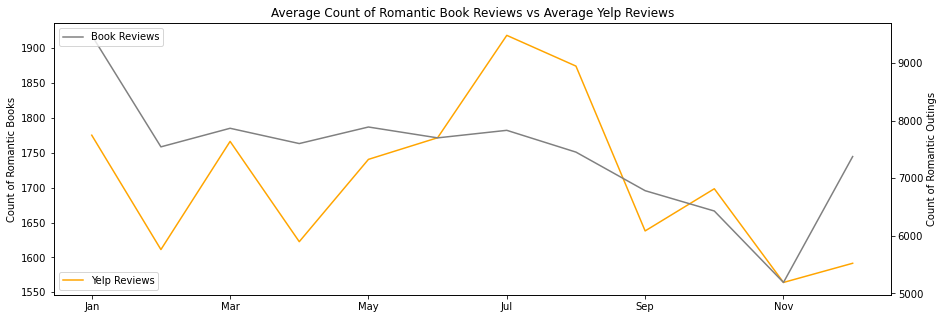

In [385]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
ax2 = ax1.twinx()
yelp_book_mean['review_id'].plot.line(ax=ax1, color='orange')
yelp_book_mean['date_updated'].plot.line(ax=ax2, color='grey')
ax2.legend(['Book Reviews'], loc='upper left')
ax1.legend(['Yelp Reviews'], loc='lower left')
plt.title('Average Count of Romantic Book Reviews vs Average Yelp Reviews')
ax1.set_ylabel('Count of Romantic Books')
ax2.set_ylabel('Count of Romantic Outings')

### Romantic Readtime and Romantic Outtime 

**Fiction != Reality**

Contrary to anecdotal evidence that most romantic dates were inspired from romance books, we found no apparent relationship between reading romantic books and doing romantic-inspired activities. 

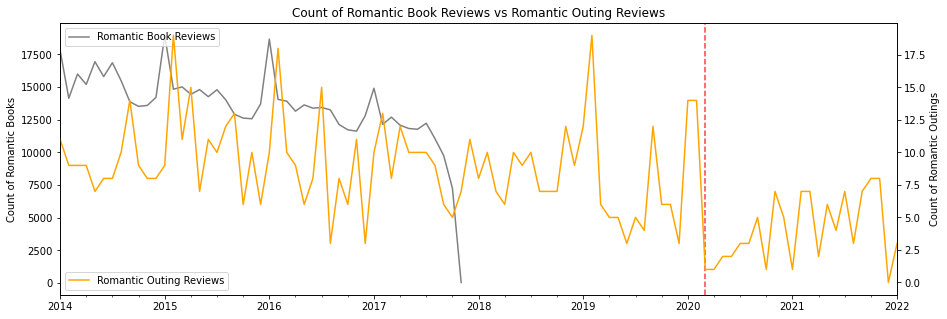

In [368]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))
ax2 = ax1.twinx()

# Reading romance books
readtime.resample('M').count().plot(ax=ax1, color='grey')
ax1.legend(['Romantic Book Reviews'], loc='upper left')
# Romantic outings
outtime.resample('M').count().plot(ax=ax2, color='orange')
ax2.legend(['Romantic Outing Reviews'], loc='lower left')

ax1.set_title('Count of Romantic Book Reviews vs Romantic Outing Reviews')
ax1.set_ylabel('Count of Romantic Books')
ax2.set_ylabel('Count of Romantic Outings')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.axvline(x=datetime.datetime(2020, 3, 1),
            color='r', linestyle='--',
            alpha=0.75)

# RESULTS
-----

In this analysis, the team identified a general trend on the reading habits and going out based on Book Graph data sets and Yelp data sets, respectively. By focusing on relevant attributes of the data sets for the data exploration analysis, our results indicated a general decline in both reading habits and going out over the years. Although people aspire to read more for the new year, reading declined just a few months later. Coincidentally, people are also going out less. However, the Yelp data sets indicate a general trend that the experience quality is improving. Perhaps, people have prioritized quality experience over the quantity of activities spent outside. Also, the team observed that people generally resolve to read more and go out more at the start of the year. But despite the good intentions, these behaviors drop just a few months later. 

Overall, the team discovered a relationship between reading habits and the frequency of going out and doing social-related activities. Contrary to our expectations, the results showed that both activities exhibit a peak at the start of the year but gradually declines as the months go by. People resolve to read and go out more but they were unable to follow through successfully throughout the year.

This apparent trend in the January peak recurs every year. However, the team realized that there might be potential bias on the Book Graph data sets since there may be a tendency for Goodreads users to input all the books they have read throughout the year at the end, and assuming Yelp reviews equate to social activity may not consider other non-business related outings such as doing sports or going to parks, or the overall popularity of the Yelp platform. Further studies can be made to look into the review behavior of other genres of books, or measure Yelp's review alongside the Yelp platform's popularity.

# REFERENCES
-----

* Crain, Caleb. “Why We Don't Read, Revisited.” The New Yorker, 14 June 2018, www.newyorker.com/culture/cultural-comment/why-we-dont-read-revisited.
* Mengting Wan, Julian McAuley, "Item Recommendation on Monotonic Behavior Chains", in RecSys'18.  [bibtex]
* Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora", in ACL'19. [bibtex]
* Yelp. www.yelp.com/dataset/documentation/main. Accessed 25 Oct. 2022.